In [1]:
import keras
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
original_dataset_dir = 'C:/Users/shadm/Desktop/dataset/train/'

base_dir = 'C:/Users/shadm/Desktop/dataset/catsVSnonCats'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_nonCats_dir = os.path.join(train_dir, 'nonCats')
os.mkdir(train_nonCats_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_nonCats_dir = os.path.join(validation_dir, 'nonCats')
os.mkdir(validation_nonCats_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_nonCats_dir = os.path.join(test_dir, 'nonCats')
os.mkdir(test_nonCats_dir)



In [3]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

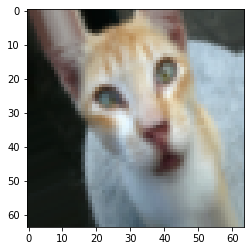

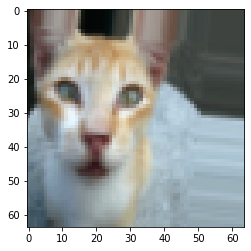

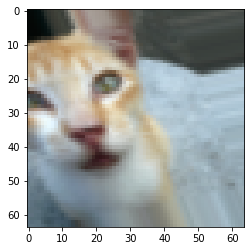

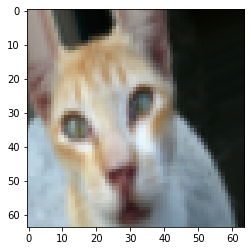

In [4]:
# This is module with image preprocessing utilities
from keras.preprocessing import image
import matplotlib.pyplot as plt

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[12]

# Read the image and resize it
img = image.load_img(img_path, target_size=(64, 64))

# Convert it to a Numpy array with shape (64, 64, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [5]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 64x64
        target_size=(64, 64),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 209 images belonging to 2 classes.
Found 50 images belonging to 2 classes.

Epoch 1/100
100/100 [==============================] - 23s 229ms/step - loss: 0.5650 - acc: 0.6769 - val_loss: 0.8819 - val_acc: 0.5200
Epoch 2/100
100/100 [==============================] - 24s 243ms/step - loss: 0.4129 - acc: 0.7843 - val_loss: 1.0136 - val_acc: 0.5400
Epoch 3/100
100/100 [==============================] - 24s 241ms/step - loss: 0.3446 - acc: 0.8430 - val_loss: 0.2662 - val_acc: 0.8200
Epoch 4/100
100/100 [==============================] - 22s 221ms/step - loss: 0.2975 - acc: 0.8773 - val_loss: 0.9663 - val_acc: 0.6600
Epoch 5/100
100/100 [==============================] - 22s 223ms/step - loss: 0.2735 - acc: 0.8893 - val_loss: 1.0096 - val_acc: 0.8000
Epoch 6/100
100/100 [==============================] - 22s 222ms/step - loss: 0.2538 - acc: 0.8931 - val_loss: 1.7644 - val_acc: 0.5000
Epoch 7/100
100/100 [==============================] - 22s 224ms/step - loss: 0.2320 - acc: 0.9057 - v

Epoch 59/100
100/100 [==============================] - 23s 226ms/step - loss: 0.0352 - acc: 0.9903 - val_loss: 1.4869 - val_acc: 0.8200
Epoch 60/100
100/100 [==============================] - 22s 224ms/step - loss: 0.0371 - acc: 0.9886 - val_loss: 1.7153 - val_acc: 0.7800
Epoch 61/100
100/100 [==============================] - 22s 223ms/step - loss: 0.0374 - acc: 0.9886 - val_loss: 1.7144 - val_acc: 0.8400
Epoch 62/100
100/100 [==============================] - 23s 228ms/step - loss: 0.0264 - acc: 0.9906 - val_loss: 0.0459 - val_acc: 0.8800
Epoch 63/100
100/100 [==============================] - 22s 223ms/step - loss: 0.0326 - acc: 0.9883 - val_loss: 0.7740 - val_acc: 0.7800
Epoch 64/100
100/100 [==============================] - 23s 226ms/step - loss: 0.0308 - acc: 0.9903 - val_loss: 0.1734 - val_acc: 0.8800
Epoch 65/100
100/100 [==============================] - 22s 225ms/step - loss: 0.0229 - acc: 0.9917 - val_loss: 0.1036 - val_acc: 0.9000
Epoch 66/100
100/100 [===================

In [7]:
model.save('cats_and_nonCats.h5')

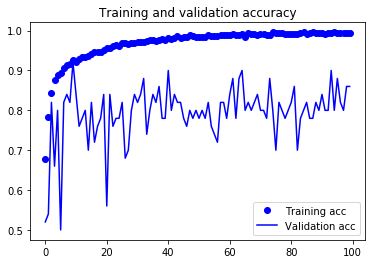

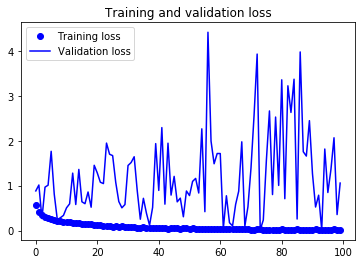

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()